In [14]:
import pandas as pd
import quandl, math, datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

In [16]:
style.use('ggplot')

In [17]:
df = quandl.get("WIKI/GOOGL")

In [5]:
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [6]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0

df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

In [7]:
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


In [8]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

In [9]:
forecast_out = int(math.ceil(0.1*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

In [10]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

C:\Users\9syed\AppData\Local\Temp\ipykernel_14088\3881897463.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


In [11]:
df.dropna(inplace=True)
y = np.array(df['label'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

"""clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
with open('regression.pickle', 'wb') as f:
    pickle.dump(clf, f)

accuracy = clf.score(X_test, y_test)"""

In [28]:
pickle_in = open('regression.pickle', 'rb')
clf = pickle.load(pickle_in)

In [25]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

In [26]:
print(forecast_set, accuracy, forecast_out)

[ 696.59380971  681.91625215  682.5238483   699.63049968  726.48536906
  741.16792957  734.91256331  761.94457188  881.52397348  872.30020486
  881.49489524  880.38395287  856.98992302  832.25856398  831.94623466
  830.032305    832.0140028   841.264686    824.5164268   835.63823929
  829.62491974  850.41437034  845.2860852   835.42877769  834.76264296
  870.90323637  871.79926943  863.83800393  866.29968618  874.200209
  865.84844344  874.1380315   861.16743299  822.97485909  812.89561364
  790.59145893  847.21495841  849.16675922  831.79678317  821.20338065
  799.86882843  815.63780796  807.56928924  789.75335746  812.06681762
  814.33354165  822.66168461  822.78954869  817.65836831  841.4545116
  833.69797302  849.86635717  828.86213353  839.3160135   823.65204448
  821.65980113  827.94267684  811.44396093  797.88943255  789.50227205
  801.76072606  810.20193743  839.67167558  850.91684665  848.84906497
  850.21743443  844.43894516  845.65049629  851.71148288  863.14803041
  855.959

In [21]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [22]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

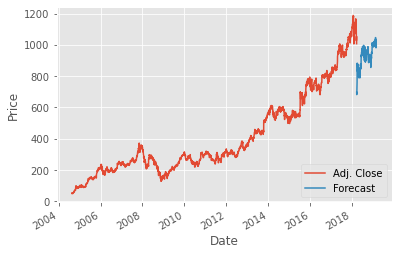

In [23]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()